In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')
import warnings
warnings.filterwarnings('ignore')


EDA and PREPROCESSING

In [13]:
df = pd.read_excel('~/Downloads/Telco_customer_churn_adapted_v2.xlsx')

In [14]:
df

,Customer ID,Tenure Months,Location,Device Class,Games Product,Music Product,Education Product,Call Center,Video Product,Use MyApp,Payment Method,Monthly Purchase (Thou. IDR),Churn Label,Longitude,Latitude,CLTV (Predicted Thou. IDR)
0,0,2,Jakarta,Mid End,Yes,Yes,No,No,No,No,Digital Wallet,70.005,Yes,106.816666,-6.2,4210.7
1,1,2,Jakarta,High End,No,No,No,No,No,No,Pulsa,91.910,Yes,106.816666,-6.2,3511.3
2,2,8,Jakarta,High End,No,No,Yes,No,Yes,Yes,Pulsa,129.545,Yes,106.816666,-6.2,6983.6
3,3,28,Jakarta,High End,No,No,Yes,Yes,Yes,Yes,Pulsa,136.240,Yes,106.816666,-6.2,6503.9
4,4,49,Jakarta,High End,No,Yes,Yes,No,Yes,Yes,Debit,134.810,Yes,106.816666,-6.2,6942.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,7038,72,Jakarta,Low End,No internet service,No internet service,No internet service,No,No internet service,No internet service,Debit,27.495,No,106.816666,-6.2,6897.8
7039,7039,24,Jakarta,Mid End,Yes,No,Yes,Yes,Yes,Yes,Digital Wallet,110.240,No,106.816666,-6.2,2782.0
7040,7040,72,Jakarta,High End,No,Yes,Yes,No,Yes,Yes,Credit,134.160,No,106.816666,-6.2,7228.0
7041,7041,11,Jakarta,Mid End,Yes,No,No,No,No,No,Pulsa,38.480,No,106.816666,-6.2,3630.9


In [15]:
df.isnull().sum()

Customer ID                     0
Tenure Months                   0
Location                        0
Device Class                    0
Games Product                   0
Music Product                   0
Education Product               0
Call Center                     0
Video Product                   0
Use MyApp                       0
Payment Method                  0
Monthly Purchase (Thou. IDR)    0
Churn Label                     0
Longitude                       0
Latitude                        0
CLTV (Predicted Thou. IDR)      0
dtype: int64

In [16]:
df['Longitude'].value_counts()

Longitude
106.816666    5031
107.609810    2012
Name: count, dtype: int64

In [17]:
df['Latitude'].value_counts()

Latitude
-6.200000    5031
-6.914744    2012
Name: count, dtype: int64

In [18]:
df = df.drop(['Latitude', 'Longitude', 'Location' , 'Customer ID'], axis=1)

In [19]:
df

,Tenure Months,Device Class,Games Product,Music Product,Education Product,Call Center,Video Product,Use MyApp,Payment Method,Monthly Purchase (Thou. IDR),Churn Label,CLTV (Predicted Thou. IDR)
0,2,Mid End,Yes,Yes,No,No,No,No,Digital Wallet,70.005,Yes,4210.7
1,2,High End,No,No,No,No,No,No,Pulsa,91.910,Yes,3511.3
2,8,High End,No,No,Yes,No,Yes,Yes,Pulsa,129.545,Yes,6983.6
3,28,High End,No,No,Yes,Yes,Yes,Yes,Pulsa,136.240,Yes,6503.9
4,49,High End,No,Yes,Yes,No,Yes,Yes,Debit,134.810,Yes,6942.0
...,...,...,...,...,...,...,...,...,...,...,...,...
7038,72,Low End,No internet service,No internet service,No internet service,No,No internet service,No internet service,Debit,27.495,No,6897.8
7039,24,Mid End,Yes,No,Yes,Yes,Yes,Yes,Digital Wallet,110.240,No,2782.0
7040,72,High End,No,Yes,Yes,No,Yes,Yes,Credit,134.160,No,7228.0
7041,11,Mid End,Yes,No,No,No,No,No,Pulsa,38.480,No,3630.9


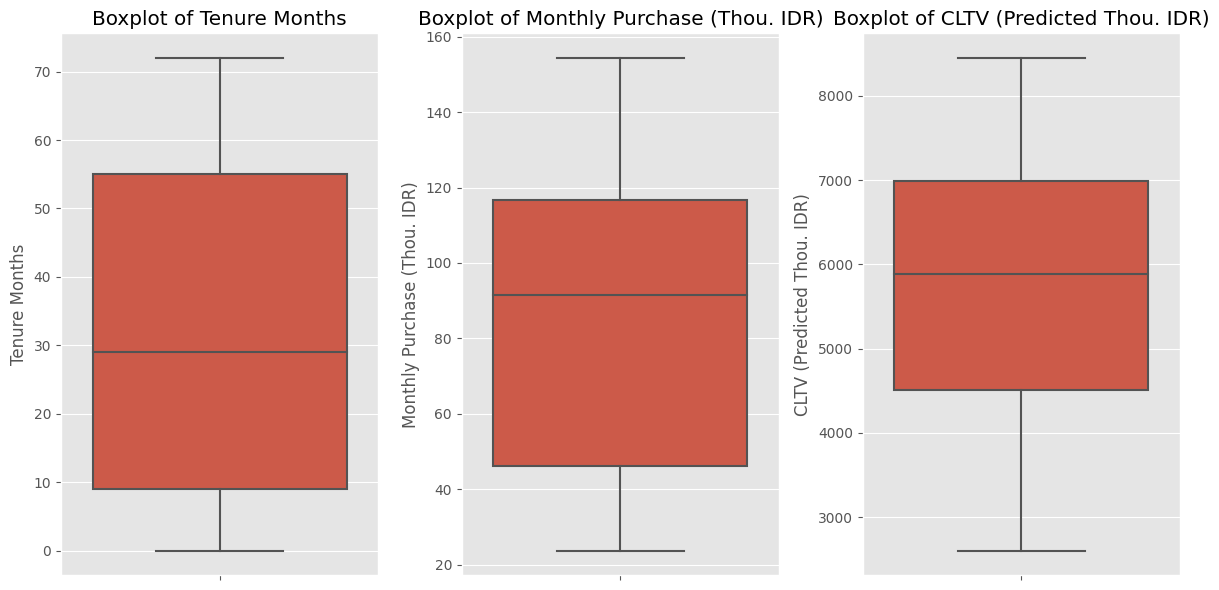

In [48]:
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns

n = len(numeric_cols)
ncols = 3
nrows = n // ncols if n % ncols == 0 else n // ncols + 1

fig, axs = plt.subplots(nrows=nrows, ncols=ncols, figsize=(12, 6))

for ax, column in zip(axs.flatten(), numeric_cols):
    sns.boxplot(y=df[column], ax=ax)
    ax.set_title(f'Boxplot of {column}')

plt.tight_layout()
plt.show()

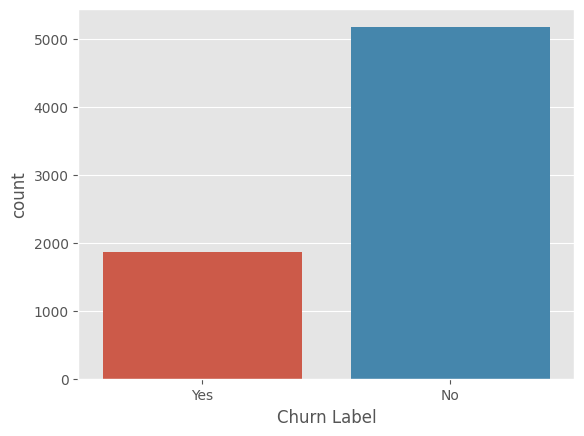

In [20]:
sns.countplot(data=df, x='Churn Label')
plt.show()

In [21]:
df['Churn Label'].value_counts()    

Churn Label
No     5174
Yes    1869
Name: count, dtype: int64

In [22]:
df_yes = df[df['Churn Label'] == 'Yes']
df_no = df[df['Churn Label'] == 'No']


                     Churn  Not Churn
Games Product                        
No                    1461       2037
Yes                    295       1724
No internet service    113       1413


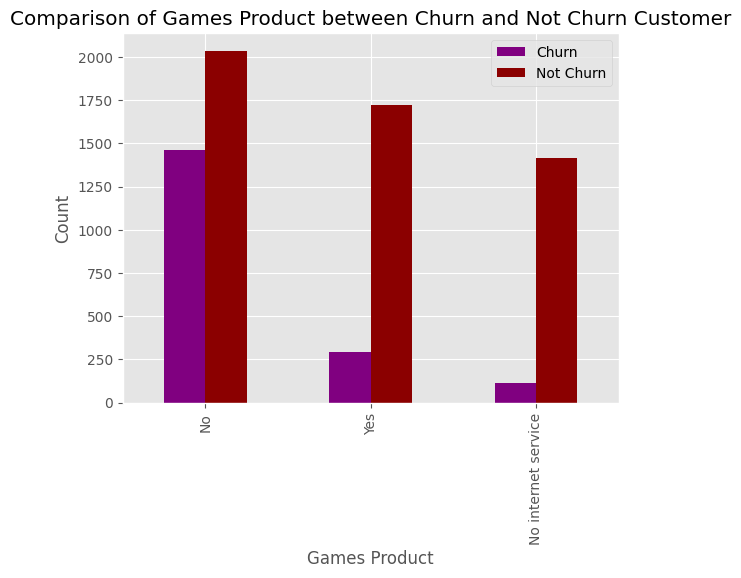

In [23]:
games_product_yes = df_yes['Games Product'].value_counts()
games_product_no = df_no['Games Product'].value_counts()

games_product_comparison = pd.concat([games_product_yes, games_product_no], axis=1)
games_product_comparison.columns = ['Churn', 'Not Churn']

print(games_product_comparison)
games_product_comparison.plot(kind='bar' , color=['purple' , 'darkred'])
plt.xlabel('Games Product')
plt.ylabel('Count')
plt.title('Comparison of Games Product between Churn and Not Churn Customer')
plt.show()


                     Churn  Not Churn
Music Product                        
No                    1233       1855
Yes                    523       1906
No internet service    113       1413


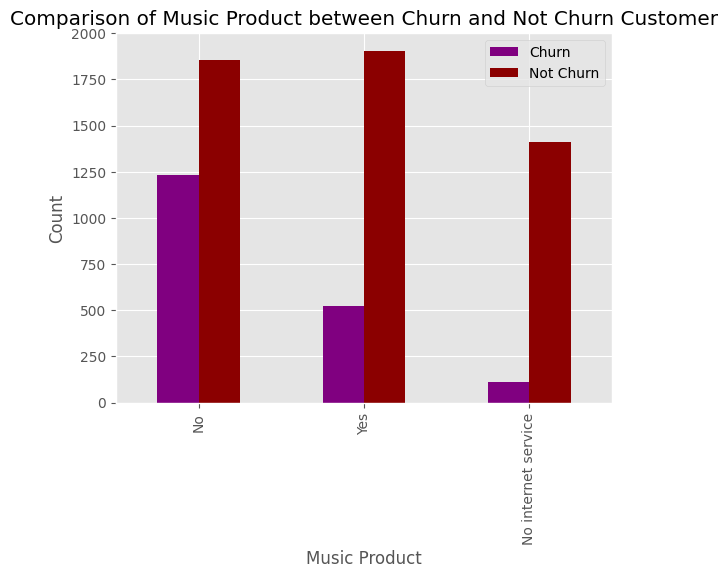

In [24]:
Music1 = df_yes['Music Product'].value_counts()
Music2 = df_no['Music Product'].value_counts()

Music_comparison = pd.concat([Music1, Music2], axis=1)
Music_comparison.columns = ['Churn', 'Not Churn']

print(Music_comparison)
Music_comparison.plot(kind='bar' , color=['purple' , 'darkred'])
plt.xlabel('Music Product')
plt.ylabel('Count')
plt.title('Comparison of Music Product between Churn and Not Churn Customer')
plt.show()


                     Churn  Not Churn
Education Product                    
No                    1211       1884
Yes                    545       1877
No internet service    113       1413


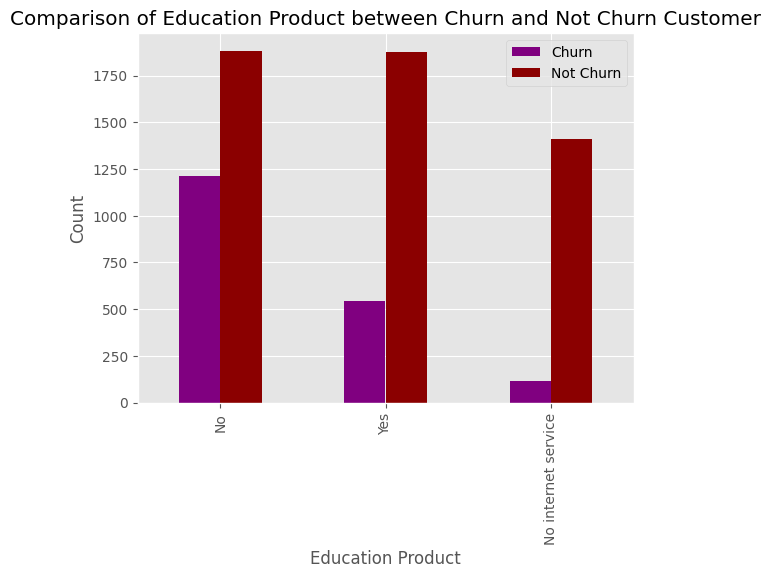

In [25]:
Edu1 = df_yes['Education Product'].value_counts()
Edu2 = df_no['Education Product'].value_counts()

Edu_comparison = pd.concat([Edu1, Edu2], axis=1)
Edu_comparison.columns = ['Churn', 'Not Churn']

print(Edu_comparison)
Edu_comparison.plot(kind='bar' , color=['purple' , 'darkred'])
plt.xlabel('Education Product')
plt.ylabel('Count')
plt.title('Comparison of Education Product between Churn and Not Churn Customer')
plt.show()


             Churn  Not Churn
Call Center                  
No            1559       3440
Yes            310       1734


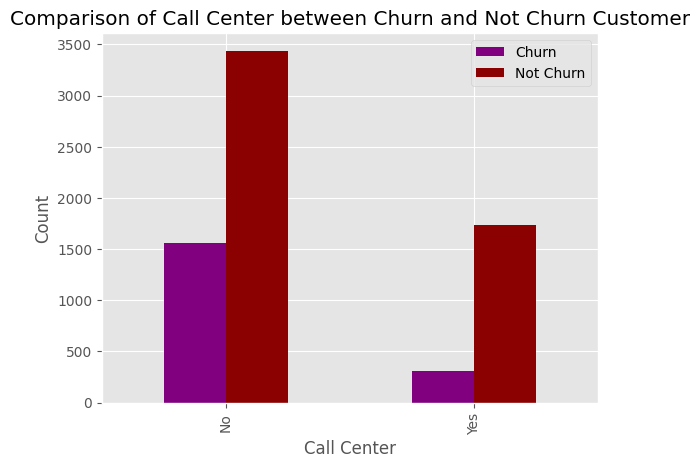

In [26]:
CallCenter1 = df_yes['Call Center'].value_counts()
CallCenter2 = df_no['Call Center'].value_counts()

CallCenter_comparison = pd.concat([CallCenter1, CallCenter2], axis=1)
CallCenter_comparison.columns = ['Churn', 'Not Churn']

print(CallCenter_comparison)
CallCenter_comparison.plot(kind='bar' , color=['purple' , 'darkred'])
plt.xlabel('Call Center')
plt.ylabel('Count')
plt.title('Comparison of Call Center between Churn and Not Churn Customer')
plt.show()


                     Churn  Not Churn
Video Product                        
No                     942       1868
Yes                    814       1893
No internet service    113       1413


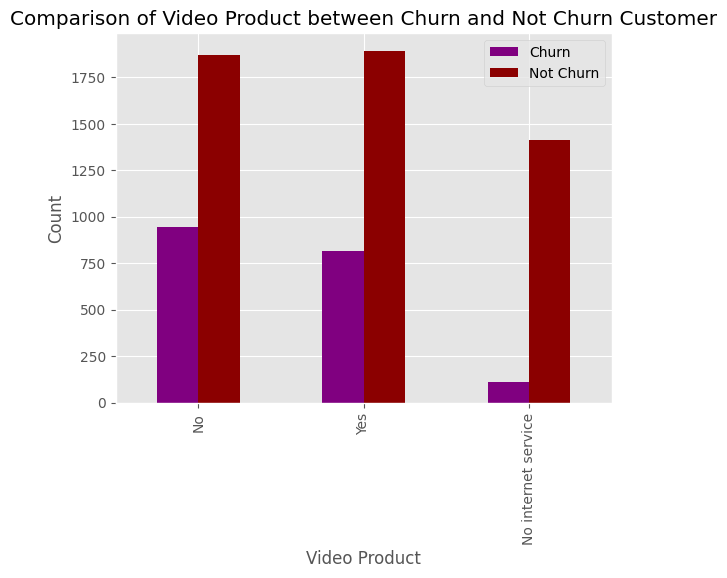

In [27]:
Video1 = df_yes['Video Product'].value_counts()
Video2 = df_no['Video Product'].value_counts()

Video_comparison = pd.concat([Video1, Video2], axis=1)
Video_comparison.columns = ['Churn', 'Not Churn']

print(Video_comparison)
Video_comparison.plot(kind='bar' , color=['purple' , 'darkred'])
plt.xlabel('Video Product')
plt.ylabel('Count')
plt.title('Comparison of Video Product between Churn and Not Churn Customer')
plt.show()


                     Churn  Not Churn
Use MyApp                            
No                     938       1847
Yes                    818       1914
No internet service    113       1413


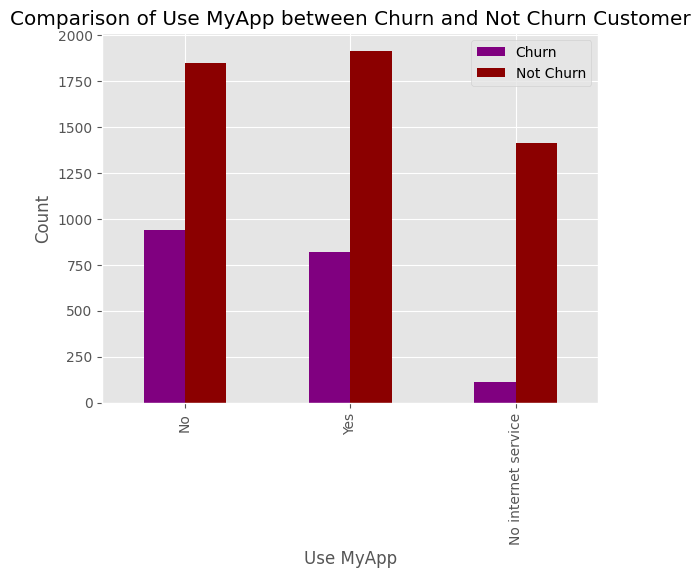

In [28]:

MyApp1 = df_yes['Use MyApp'].value_counts()
MyApp2 = df_no['Use MyApp'].value_counts()

MyApp_comparison = pd.concat([MyApp1, MyApp2], axis=1)
MyApp_comparison.columns = ['Churn', 'Not Churn']

print(MyApp_comparison)
MyApp_comparison.plot(kind='bar' , color=['purple' , 'darkred'])
plt.xlabel('Use MyApp')
plt.ylabel('Count')
plt.title('Comparison of Use MyApp between Churn and Not Churn Customer')
plt.show()


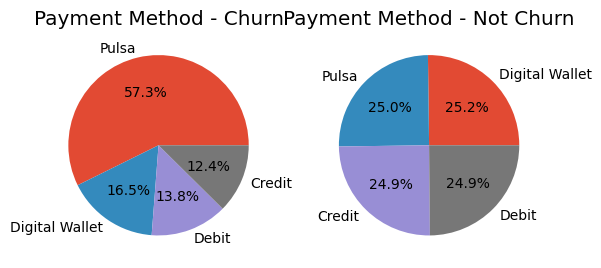

In [29]:
payment_method_yes = df_yes['Payment Method'].value_counts()
payment_method_no = df_no['Payment Method'].value_counts()

plt.subplot(1, 2, 1)
plt.pie(payment_method_yes, labels=payment_method_yes.index, autopct='%1.1f%%')
plt.title('Payment Method - Churn')

plt.subplot(1, 2, 2)
plt.pie(payment_method_no, labels=payment_method_no.index, autopct='%1.1f%%')
plt.title('Payment Method - Not Churn')

plt.show()

In [30]:
df['Tenure Classification'] = df['Tenure Months'].apply(lambda x: 'First' if x <= 12 else 'Second' if x <= 24 else 'Third')


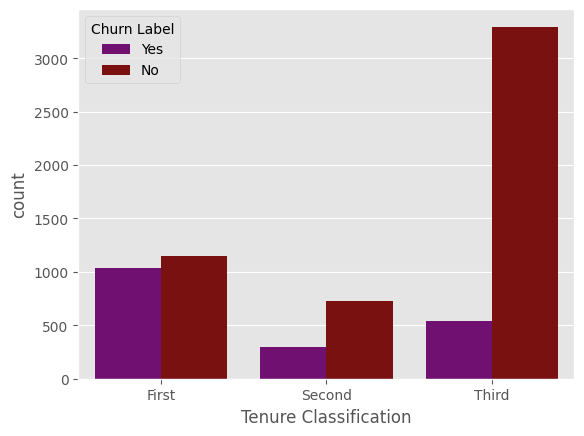

In [31]:
order = ['First', 'Second', 'Third']
sns.countplot(data=df, x='Tenure Classification', hue='Churn Label', palette=['purple', 'darkred'], order=order)
plt.show()



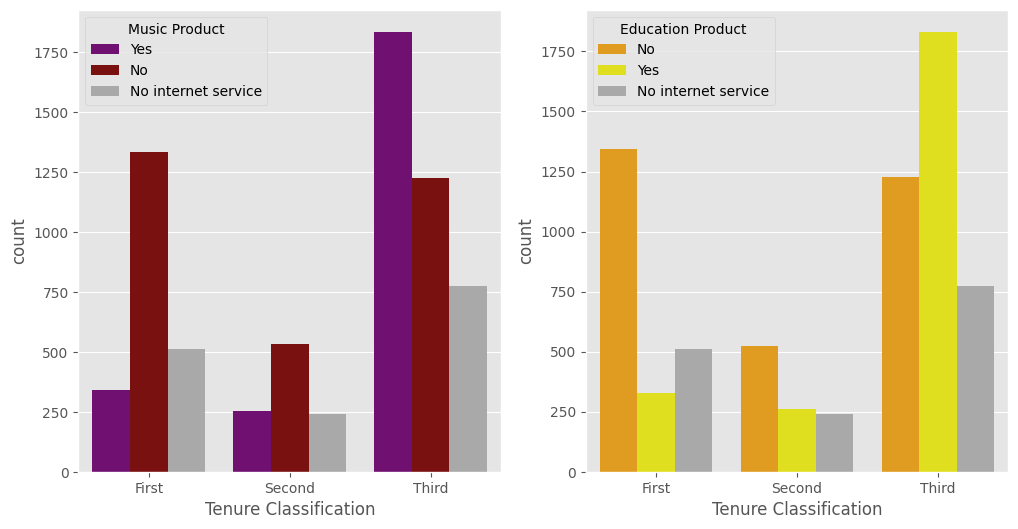

In [32]:
order = ['First', 'Second', 'Third']

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.countplot(data=df, x='Tenure Classification', hue='Music Product', palette=['purple', 'darkred' , 'darkgrey'], order=order)

plt.subplot(1, 2, 2)
sns.countplot(data=df, x='Tenure Classification', hue='Education Product', palette=['orange', 'yellow' , 'darkgrey'], order=order)

plt.show()

MODELLING 

In [33]:
df_model = df.drop(['Tenure Classification' , 'Device Class' , 'Payment Method'], axis=1)

In [34]:
df_model = df_model.replace('No internet service', 'No')

In [35]:
df_model

,Tenure Months,Games Product,Music Product,Education Product,Call Center,Video Product,Use MyApp,Monthly Purchase (Thou. IDR),Churn Label,CLTV (Predicted Thou. IDR)
0,2,Yes,Yes,No,No,No,No,70.005,Yes,4210.7
1,2,No,No,No,No,No,No,91.910,Yes,3511.3
2,8,No,No,Yes,No,Yes,Yes,129.545,Yes,6983.6
3,28,No,No,Yes,Yes,Yes,Yes,136.240,Yes,6503.9
4,49,No,Yes,Yes,No,Yes,Yes,134.810,Yes,6942.0
...,...,...,...,...,...,...,...,...,...,...
7038,72,No,No,No,No,No,No,27.495,No,6897.8
7039,24,Yes,No,Yes,Yes,Yes,Yes,110.240,No,2782.0
7040,72,No,Yes,Yes,No,Yes,Yes,134.160,No,7228.0
7041,11,Yes,No,No,No,No,No,38.480,No,3630.9


In [36]:
yncolumns = df_model.columns[df_model.isin(['Yes', 'No']).any()]
df_model[yncolumns] = df_model[yncolumns].replace({'Yes': 1, 'No': 0})


In [37]:
from sklearn.preprocessing import MinMaxScaler

columns_to_scale = ['CLTV (Predicted Thou. IDR)', 'Monthly Purchase (Thou. IDR)', 'Tenure Months']

# Create an instance of MinMaxScaler
scaler = MinMaxScaler()

# Apply the scaler to the selected columns
df_model[columns_to_scale] = scaler.fit_transform(df_model[columns_to_scale])


df_model

,Tenure Months,Games Product,Music Product,Education Product,Call Center,Video Product,Use MyApp,Monthly Purchase (Thou. IDR),Churn Label,CLTV (Predicted Thou. IDR)
0,0.027778,1,1,0,0,0,0,0.354229,1,0.274850
1,0.027778,0,0,0,0,0,0,0.521891,1,0.155215
2,0.111111,0,0,1,0,1,1,0.809950,1,0.749166
3,0.388889,0,0,1,1,1,1,0.861194,1,0.667111
4,0.680556,0,1,1,0,1,1,0.850249,1,0.742050
...,...,...,...,...,...,...,...,...,...,...
7038,1.000000,0,0,0,0,0,0,0.028856,0,0.734490
7039,0.333333,1,0,1,1,1,1,0.662189,0,0.030465
7040,1.000000,0,1,1,0,1,1,0.845274,0,0.790972
7041,0.152778,1,0,0,0,0,0,0.112935,0,0.175673


In [38]:
# X = df_model.drop(['Churn Label'], axis=1)
X = df_model.drop(['Churn Label','Games Product' , 'Call Center' ,'Video Product' , 'Use MyApp'], axis=1)
y = df_model['Churn Label']

In [39]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Initialize the models
model = LogisticRegression(penalty='l2', C=0.1, solver='newton-cholesky', random_state=0)

# Fit the models on the training data
model.fit(X_train, y_train)

# Predict the labels for the test data
logreg_pred = model.predict(X_test)

# Calculate accuracy score
accuracy = accuracy_score(y_test, logreg_pred)
print('Accuracy score: ', accuracy)

# Calculate precision, recall, F1 score, and support
classification_report = classification_report(y_test, logreg_pred)
print('Classification Report:\n', classification_report)

# Calculate area under the ROC curve (AUC-ROC)
auc_roc = roc_auc_score(y_test, logreg_pred)
print('AUC-ROC score: ', auc_roc)


Accuracy score:  0.7927608232789212
Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.92      0.87      1048
           1       0.65      0.42      0.51       361

    accuracy                           0.79      1409
   macro avg       0.74      0.67      0.69      1409
weighted avg       0.78      0.79      0.78      1409

AUC-ROC score:  0.6691111945190416
